In [1]:
# Import Splinter and BeautifulSoup
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
# Visit the Mars NASA news site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)


In [4]:
#parsing the html
html = browser.html
html_soup = soup(html, 'html.parser')


In [5]:
#extracting the table
table = html_soup.find('table', class_='table')
#table = html_soup.find('tbody')
#mars_facts = {}
#Scraping using pandas 
df = pd.read_html(url)
df

#rows = table.find_all('tr')
#for row in table:
    #row_heading = row.find('th').text
    
    #row_data = row.find('td').text
    
    #mars_facts[row_heading] = row_data

#print(mars_facts)



[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [6]:
mars_df = df[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [7]:
#Converting dates in the dataframe
mars_df['terrestrial_date']=pd.to_datetime(mars_df['terrestrial_date'])

In [9]:
mars_df.sol.astype('int32')
mars_df.ls.astype('int32')
mars_df.month.astype('int32')


0       6
1       6
2       6
3       6
4       6
       ..
1862    5
1863    5
1864    5
1865    5
1866    5
Name: month, Length: 1867, dtype: int32

In [10]:
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [21]:
#How many Martian (and not Earth) days worth of data exist in the scraped dataset?
mars_df.month.count()

1867

In [11]:
#Number of months on Mars:12
mars_df.month.unique()

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5])

In [17]:
#What are the coldest and the warmest months on Mars (at the location of Curiosity)? 
#Coldest months are March and April
#Warmest months are August and September

pivot_table = mars_df.groupby(["month"]).mean()
pivot_table

,id,sol,ls,min_temp,pressure
month,,,,,
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
6,735.306122,750.829932,164.897959,-75.299320,745.054422
7,714.549296,715.105634,194.894366,-72.281690,795.105634
8,718.078014,795.333333,224.347518,-68.382979,873.829787
9,785.843284,861.186567,254.052239,-69.171642,913.305970


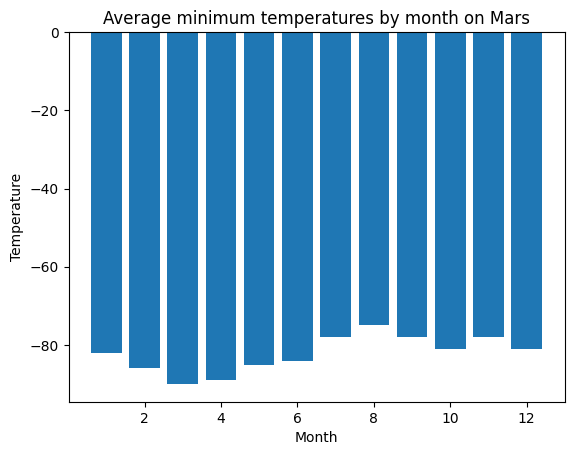

In [19]:
#plot the results
import matplotlib.pyplot as plt

plt.bar(mars_df["month"],mars_df["min_temp"])
plt.title('Average minimum temperatures by month on Mars')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()


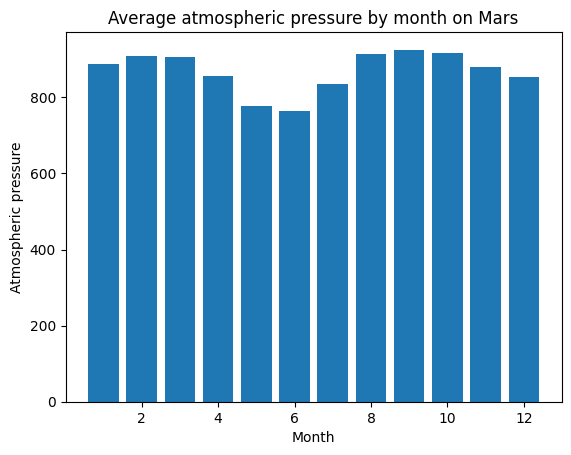

In [20]:
#Which months have the lowest and the highest atmospheric pressure on Mars? 
#Lowest : May and June, Highest: February and September

#Plot the results as a bar chart.
plt.bar(mars_df["month"],mars_df["pressure"])
plt.title('Average atmospheric pressure by month on Mars')
plt.xlabel('Month')
plt.ylabel('Atmospheric pressure')
plt.show()


In [28]:
#About how many terrestrial (Earth) days exist in a Martian year? 
#That is, in the time that Mars circles the Sun once, how many days elapse on Earth? 

#counting the days in each month
days = mars_df.groupby(["month"]).count()
days

,id,terrestrial_date,sol,ls,min_temp,pressure
month,,,,,,
1,174,174,174,174,174,174
2,178,178,178,178,178,178
3,192,192,192,192,192,192
4,194,194,194,194,194,194
5,149,149,149,149,149,149
6,147,147,147,147,147,147
7,142,142,142,142,142,142
8,141,141,141,141,141,141
9,134,134,134,134,134,134


In [31]:
#adding up the days for all the months
total_days = days.sum(axis = 0)
print(total_days)

id                  1867
terrestrial_date    1867
sol                 1867
ls                  1867
min_temp            1867
pressure            1867
dtype: int64


In [ ]:
#Visually estimate the result by plotting the daily minimum temperature.

In [ ]:
#Export the DataFrame to a CSV file.